<p align="center">
  <a href="https://example.com/">
    <img src="https://mma.prnewswire.com/media/1613054/Seedtag_Logo.jpg?p=facebook" alt="Seedtag" width=72 height=72>
  </a>

  <h3 align="center">Data Science Test Seedtag</h3>

  <p align="center">
    The Squirrel Census  is a multimedia science, design, and storytelling project focusing on Eastern gray squirrels. Present analysis was done by Servando Torres - cool candidate :) -
    <br>
    <a href="https://www.linkedin.com/in/servando-torres-239a26b0/">Linkedin</a>
    ·
    <a href="vandotorresg@gmail.com">Gmail</a>
  </p>
</p>

## Table of contents

- [Thought process](#thought-process)
- [How to interpret this notebook](#how-to-interpret-this-notebok)
- [Important things to know about the current study](#important-things-to-know-about-the-current-study)
- [Give me data!](#give-me-data)
- [Central Park](#get-to-know-central-park-first)
- [New yorker squirrel](#what-does-a-new-yorker-squirrel-looks-like)
- [Interactions between them](#interactions-between-them-and-how-they-communicate-with-eachother)
- [Interactions with humans](#interactions-with-humans)
- [Are they organized?](#are-they-organized)
- [Friendliness](#is-their-friendliness-random-or-related-to-other-factors)




### Thought process 

The problem scenario states three main epics to explore and find the best data-driven answer. 

1) Make a sociological study about squirrels in Central Park in terms of how they interact between themselves and people.

2) Squirrels no jokin'. We suspect there are organized squirrel gangs (maybe dealing with nuts), can you
confirm/deny this?

3) Friends or foes. Is their friendliness random or related to specific factors

To better understand each and one of them. We'd decompose them into several, more tangible questions. This will helps us to accurately find the best method to tackle the problem and create a storyline. 

The approach would be Top-Down as in creating a storyline from interesting descriptive statistics, charts, and other features to help us create context on purpose, location, subjects of study (squirrels)
As we down the rabbit hole we can start answering more in-depth questions like organization, interaction, and friendliness.

The storyline would be: 

- ***Get to know central park first***

- ***Important things to know about the current study***

- ***What does a new yorker squirrel look like?***

- ***What are the primary activities of a squirrel in - central park?***

- ***How do they interact with each other?***

- ***How do they interact with humans?***

- ***Are they organized?***

- ***Are they even friendly with humans? if so is this - related to some factors?***





### How to interpret this notebok

Each question within the storyline would have always: 
- Graphs: present useful visualizations

- Tables: support numerical analysis

- Code commented: `# commented code to make life easier`
    
- *Observations and Conclusions*: Descriptive observations, assumptions, and conclusions based on the findings

Some questions required a **methodology** or a list of steps followed to get to the answer



### Give me data!

At first glance at the data we can start by categorizing variables following our logic and based on previous research the study

Variables can be categorized into the following groups:

- Geographical
- General observation variables
- Squirrel activities variables
- Physical features of a squirrel
- Interaction

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
# read csv
df = pd.read_csv('seedtag_test.csv')


In [2]:
df.head(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Combination of Primary and Highlight Color,Color notes,Location,Above Ground Sighter Measurement,Specific Location,Running,Chasing,Climbing,Eating,Foraging,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,Gray+,NaN,Above Ground,10,NaN,False,True,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,Gray+,Nothing selected as Primary. Gray selected as ...,NaN,NaN,NaN,False,False,False,True,True,NaN,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,Gray+Cinnamon,NaN,Above Ground,NaN,on tree stump,False,False,False,False,True,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [3]:
#sanity checks
df_v1 = df.copy() # create copy for further analysis and backup
df['Date'] = pd.to_datetime(df['Date'], format='%m%d%Y') # encode datatime
df.columns = df.columns.str.replace(' ', '_') # makes analysis easier
df.columns = df.columns.str.lower()# makes analysis easier

In [4]:
# Quick statistics
df.describe(include= [ 'object'])


,unique_squirrel_id,hectare,shift,age,primary_fur_color,highlight_fur_color,combination_of_primary_and_highlight_color,color_notes,location,above_ground_sighter_measurement,specific_location,other_activities,other_interactions,lat/long
count,3023,3023,3023,2902,2968,1937,3023,182,2959,2909,476,437,240,3023
unique,3018,339,2,3,3,10,22,135,2,41,304,307,197,3023
top,7D-PM-1010-01,14D,PM,Adult,Gray,Cinnamon,Gray+,Gray & Cinnamon selected as Primary. White sel...,Ground Plane,FALSE,tree,digging,runs from (dog),POINT (-73.9561344937861 40.7940823884086)
freq,2,32,1676,2568,2473,767,895,9,2116,2116,43,19,9,1


In [5]:
# Duplicated squirrel
df[df.unique_squirrel_id == '7D-PM-1010-01' ]

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,combination_of_primary_and_highlight_color,color_notes,location,above_ground_sighter_measurement,specific_location,running,chasing,climbing,eating,foraging,other_activities,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,lat/long
517,-73.974945,40.772066,7D-PM-1010-01,07D,PM,2018-10-10,1,Adult,Gray,White,Gray+White,NaN,Ground Plane,FALSE,outside fenced hectare,True,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9749446629706 40.7720659696067)
2234,-73.974852,40.771959,7D-PM-1010-01,07D,PM,2018-10-10,1,Adult,Gray,White,Gray+White,NaN,Ground Plane,FALSE,outside fenced hectare,True,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9748522796455 40.7719586621003)


In [6]:
# Quick statistics of boolean variables
df.describe(include= ['bool'])

,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from
count,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023
unique,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,2293,2744,2365,2263,1588,2921,2973,3020,2868,2589,2845,1569,2345


*Observations*

- It seems there are two main datatypes on the dataset: boolean and object.

- It's interesting that all boolean variables have False as a top value count. Unfortunately, this could also mean that the activity element of the squirrels is somewhat limited.

- 3018 unique squirrels were studied.

- There are only 5 squirrels repeated (duplicated) in this analysis. Probably this is related to so many False in the data. If fewer squirrels had been studied, then we could see different facets of their activity throughout time. 

- The majority of squirrels are adults and the shift the study was performed mainly during the afternoon.

In [7]:
# Missing values

from personalpipeline.src.preprocessing import eda
eda = eda.Eda()

eda.missing_values_table(df)

Your selected dataframe has 31 columns.
There are 9 columns that have missing values.


/Users/admin/miniconda3/envs/frozen/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Missing Values,% of Total Values
color_notes,2841,94.0
other_interactions,2783,92.1
other_activities,2586,85.5
specific_location,2547,84.3
highlight_fur_color,1086,35.9
age,121,4.0
above_ground_sighter_measurement,114,3.8
location,64,2.1
primary_fur_color,55,1.8


*Observations*

- Top 4 variables with missing values are related to sighters notes which can be categorized as missing at random given its realtion to other other variables.

- Highlight_Fur_Color: discrete value, missing data can be categorized as missing at random. Data can be inferred from other descriptive like primary_fur_color. 

- Above_Ground_Sighter_Measurement, Location and Primary_Fur_Color have a significantly lower missing data percentage, around 5%.


### Get to know Central Park first

In [8]:
import folium
from folium.plugins import MarkerCluster
cp = folium.Map(location=[40.781832, -73.966714], tiles="Stamen Toner", zoom_start = 14)
points_list = df[["y","x"]].values.tolist()
cp2 = folium.Map(location=[40.781832, -73.966714],  zoom_start = 14)
marker_cluster = folium.plugins.MarkerCluster().add_to(cp2)
for point in range(0, len(points_list)):
    folium.Marker(points_list[point]).add_to(cp2).add_to(marker_cluster)

In [9]:
cp2

*Observations*

- The sample contains over 3,000 data point entries. Polygons are formed based on the exact location of the squirrel was spotted.

-  Overall the breadths of Central Park have the most squirrel activity.

- Central Park South has considerable squirrel activity - overall 600 data points -  near key attractions such as Columbus Circle, Central Park Zoo, and The pond and Hallet Nature Sanctuary

- Followed by Central Park North with almost 700 data points. It's noticeable that polygons with higher squirrel activity are either in the limited green areas or lakes such as the Jaqueline Kennedi Onassis Reservoir.

### Important things to know about the current study 

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def scatterplot_xy_all_places(df, hue, title, palette=None):
    """

    """
    figure, axis = plt.subplots(1, 2, figsize=(15, 8))
    axis[0].set_title(title)
    axis[1].set_title('Proportion values of ' + hue)
    sns.scatterplot(x="x", y="y", hue=hue, data=df, alpha=0.9, palette=palette, ax=axis[0])
    df[hue].value_counts(normalize = True).sort_values().plot.barh(ax=axis[1])
    plt.show()

In [111]:
print('First date of the study',df.date.min())
print('Last date of the study',df.date.max())

First date of the study 2018-10-06 00:00:00
Last date of the study 2018-10-20 00:00:00


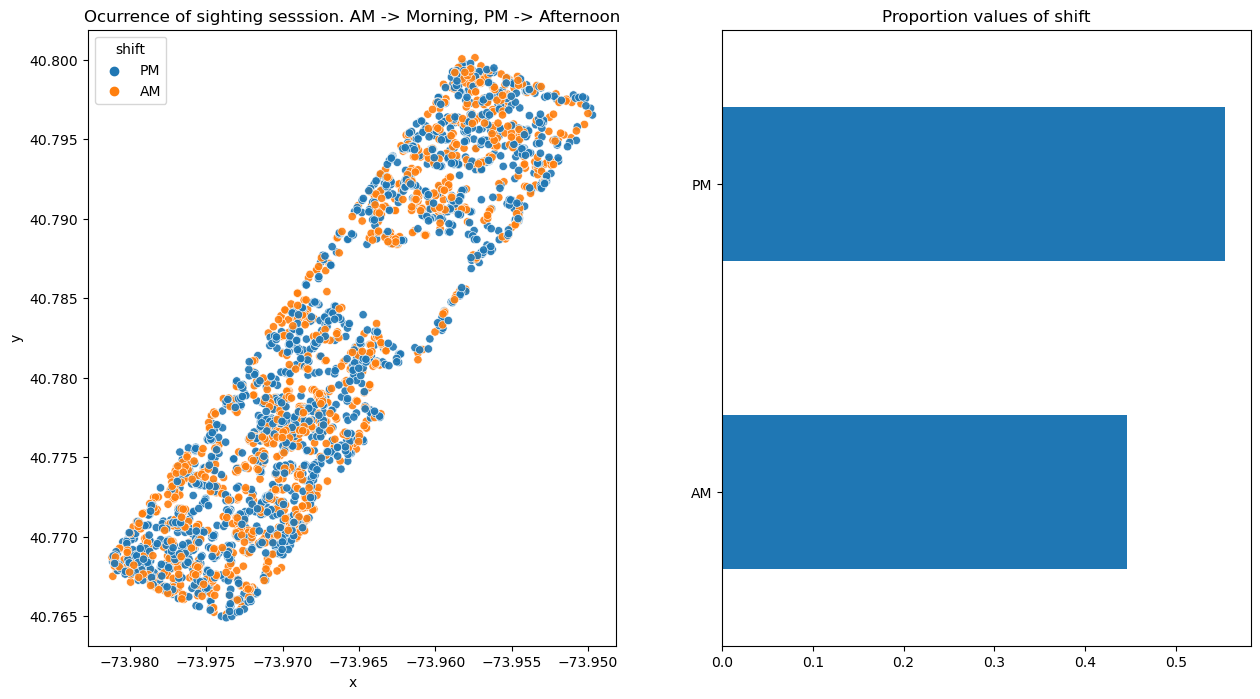

In [11]:
scatterplot_xy_all_places(df, 'shift', 'Ocurrence of sighting sesssion. AM -> Morning, PM -> Afternoon')

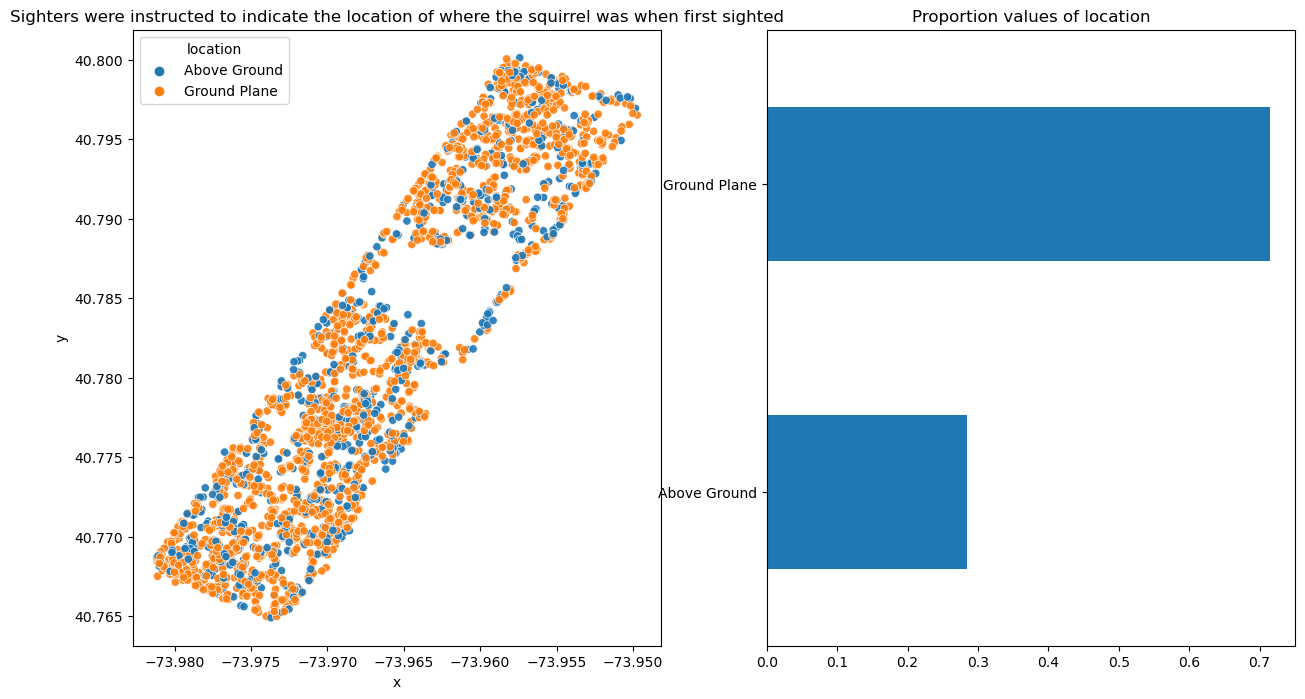

In [12]:
scatterplot_xy_all_places(df, 'location', 'Sighters were instructed to indicate the location of where the squirrel was when first sighted')

*Observations*

- Acording to the feature date, samples that were collected over two weeks from October 6th, 2018 until October 20th, 2018.

- Study was performed slightly more during the afternoon with more than 55% entries. 

- Among all squirrels within the study almost 70% were spotted on the ground plane, while less than 30% were spotted above ground. 

### What does a new yorker squirrel looks like?


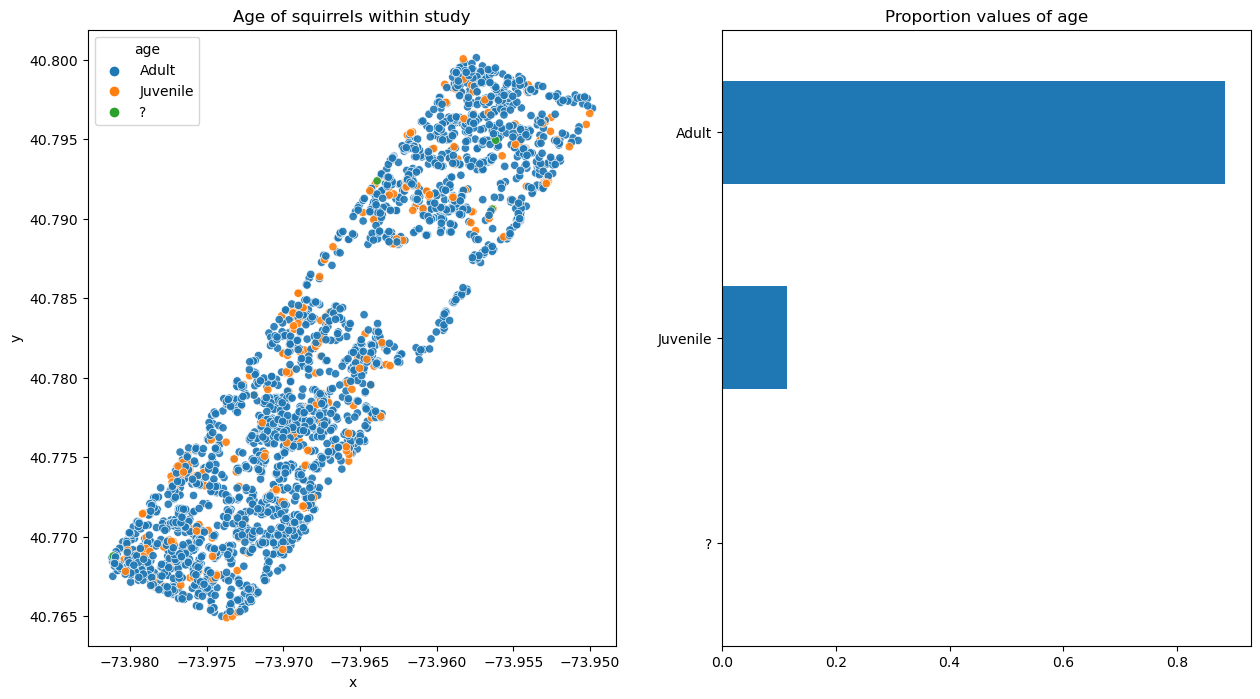

In [13]:
scatterplot_xy_all_places(df, 'age', 'Age of squirrels within study')


In [15]:
df_v1 = (df_v1 * 1 ) # factorize boolean variables
df_v1['Date'] = pd.to_datetime(df_v1['Date'], format='%m%d%Y') # encode datatime
df_v1.columns = df_v1.columns.str.replace(' ', '_') # makes analysis easier
df_v1.columns = df_v1.columns.str.lower()# makes analysis easier


In [16]:
# Convert squirrel ID to integer
df_v1.unique_squirrel_id = pd.Categorical(df_v1.unique_squirrel_id)
df_v1.unique_squirrel_id = df_v1.unique_squirrel_id.cat.codes

Text(0.5, 1.1, 'Primary fur color in new yorker squirrels')

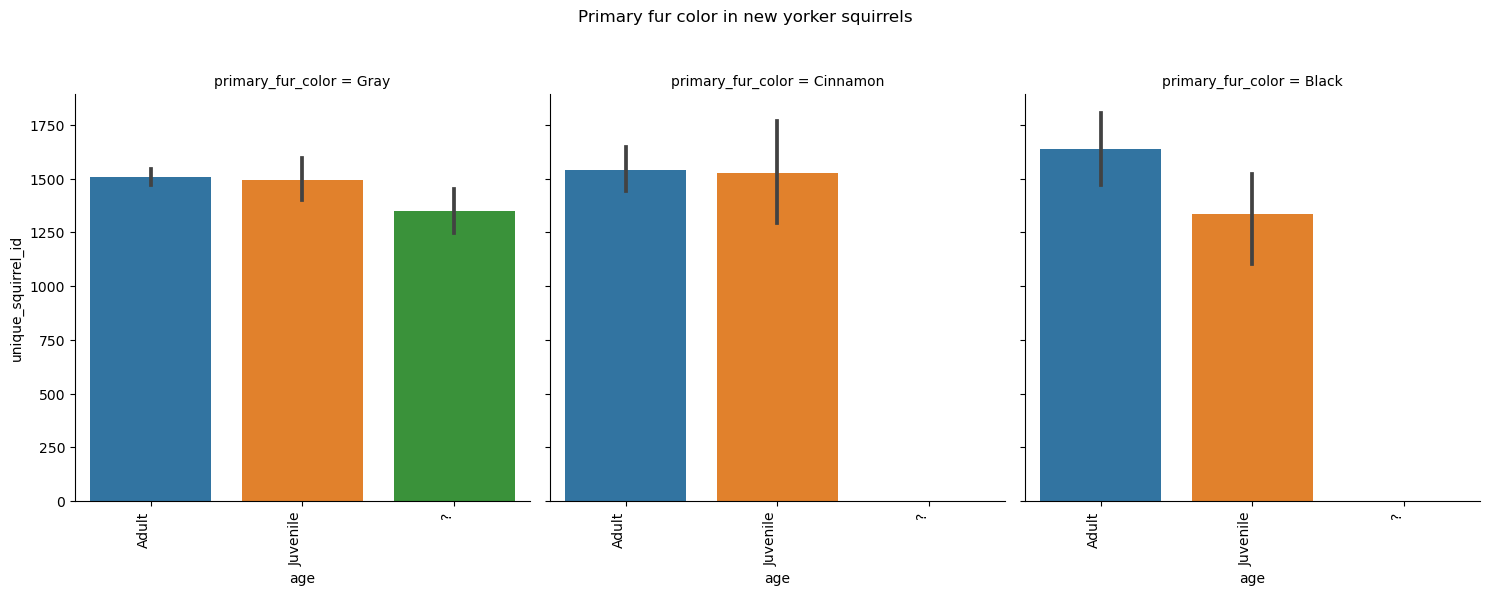

In [17]:
csrpl = sns.catplot(x='age', y='unique_squirrel_id', col ='primary_fur_color', kind= 'bar', data=df_v1)
csrpl.set_xticklabels(rotation=90, horizontalalignment='right')
csrpl.fig.suptitle("\n".join(['Primary fur color in new yorker squirrels']), y=1.1)

In [ ]:
csrpl = sns.catplot(x='age', y='unique_squirrel_id', col ='highlight_fur_color',kind= 'bar',  data=df_v1)
csrpl.set_xticklabels(rotation=90, horizontalalignment='right')
csrpl.fig.suptitle("\n".join(['Hightlight fur color in New Yorker squirrels']), y=1.1)

*Observations*

- Based on the data it is evident that the squirrel population is aging. 88% of the squirrels are adults, leaving only 12% of the population as juveniles ignoring the number of data entries that couldn't be marked

- A vast majority of the squirrels are primarily gray, followed by cinnamon. Interestingly these two colors seem to be equal in adult and juvenile squirrels. We may do a primer assumption that color in this case is due to the species and not the age. 

-  Secondary colors and combinations of them vary more dramatically. 

## Interactions between them and how they communicate with eachother.

### What are the primary activities of a squirrel in  Central Park?


Text(0.5, 1.0, 'Squirrels foraging')

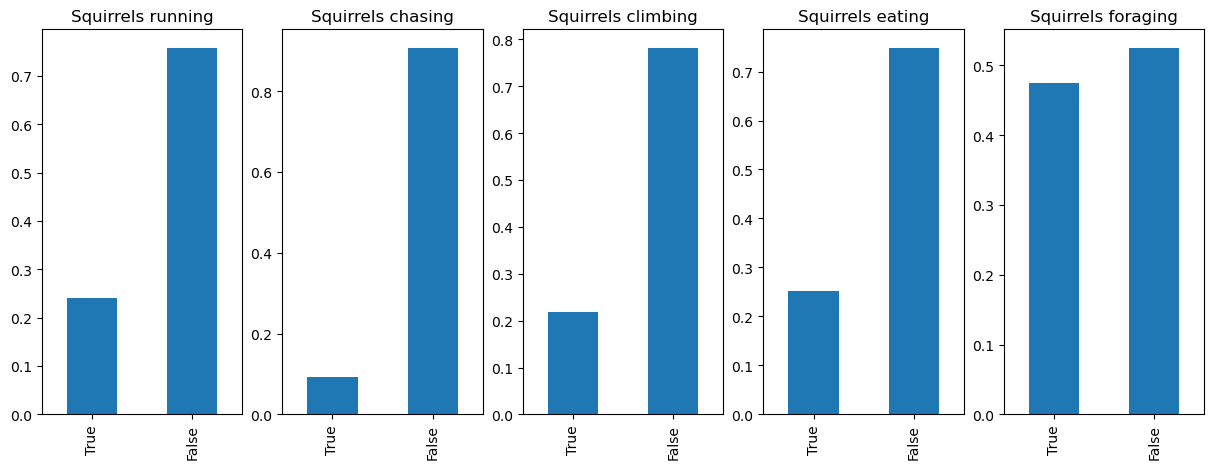

In [18]:
figure, axis = plt.subplots(1, 5, figsize=(15, 5))
df['running'].value_counts(normalize = True).sort_values().plot.bar( ax=axis[0])
df['chasing'].value_counts(normalize = True).sort_values().plot.bar(ax=axis[1])
df['climbing'].value_counts(normalize = True).sort_values().plot.bar(ax=axis[2])
df['eating'].value_counts(normalize = True).sort_values().plot.bar(ax=axis[3])
df['foraging'].value_counts(normalize = True).sort_values().plot.bar(ax=axis[4])
axis[0].set_title('Squirrels running')
axis[1].set_title('Squirrels chasing')
axis[2].set_title('Squirrels climbing')
axis[3].set_title('Squirrels eating')
axis[4].set_title('Squirrels foraging')

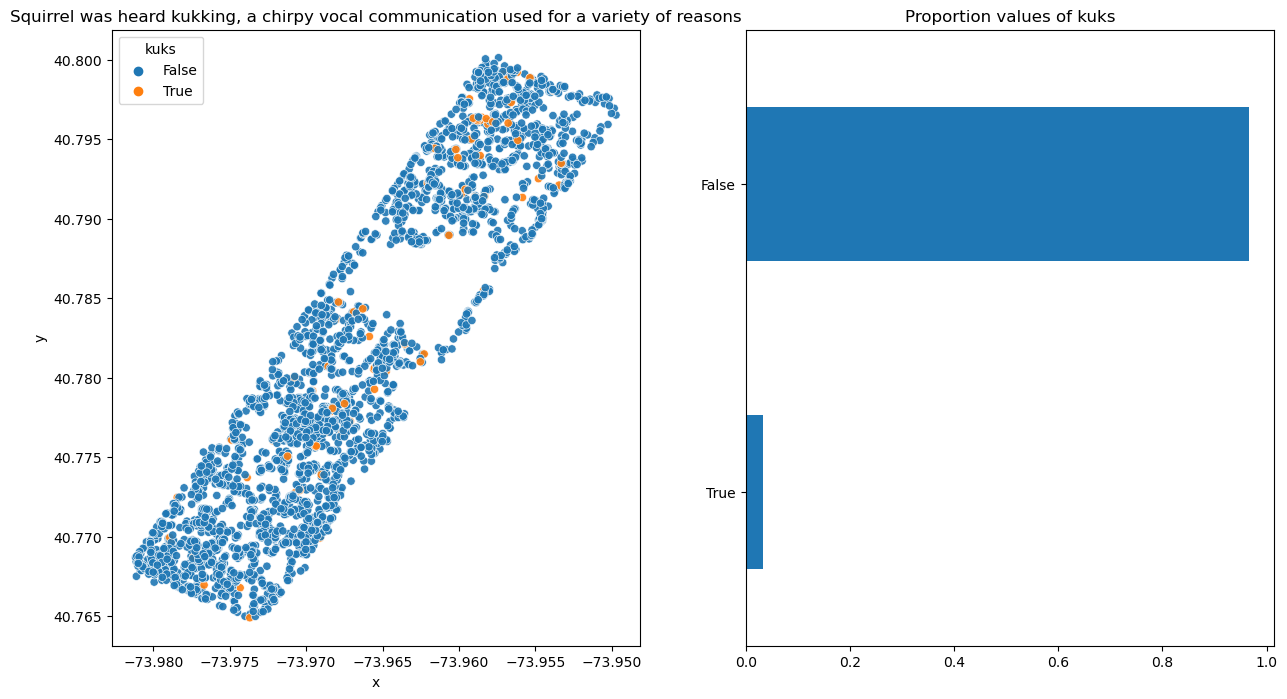

In [19]:
scatterplot_xy_all_places(df, 'kuks', 'Squirrel was heard kukking, a chirpy vocal communication used for a variety of reasons')

*Observations*

- As we previously saw in the descriptive statistics. The activity element of the squirrel seems to be limited. 

- Four physical activities out of 5 were collected to False with an outstanding > 80% leaving this data with almost no physical activity registered to True 

- Squirrels looking for food was the primary activity seen within this data with almost 50% of squirrels looking for food.


### Interactions with humans 

In [20]:

def scatterplot_xy_true_elements_vs_all(df, column, title, ):
    """
    """
    figure, axis = plt.subplots(1, 2, figsize=(15, 8))
    axis[0].set_title(title)
    axis[1].set_title('Proportion values of ' + column)
    sns.scatterplot(x="x", y="y", data=df[df[column] == False], alpha=0.1, palette="RdBu", ax=axis[0])
    sns.scatterplot(x="x", y="y", data=df[df[column] == True], alpha=0.9, palette="muted", ax=axis[0])
    df[column].value_counts(normalize = True).sort_values().plot.bar(ax=axis[1])
    plt.show()

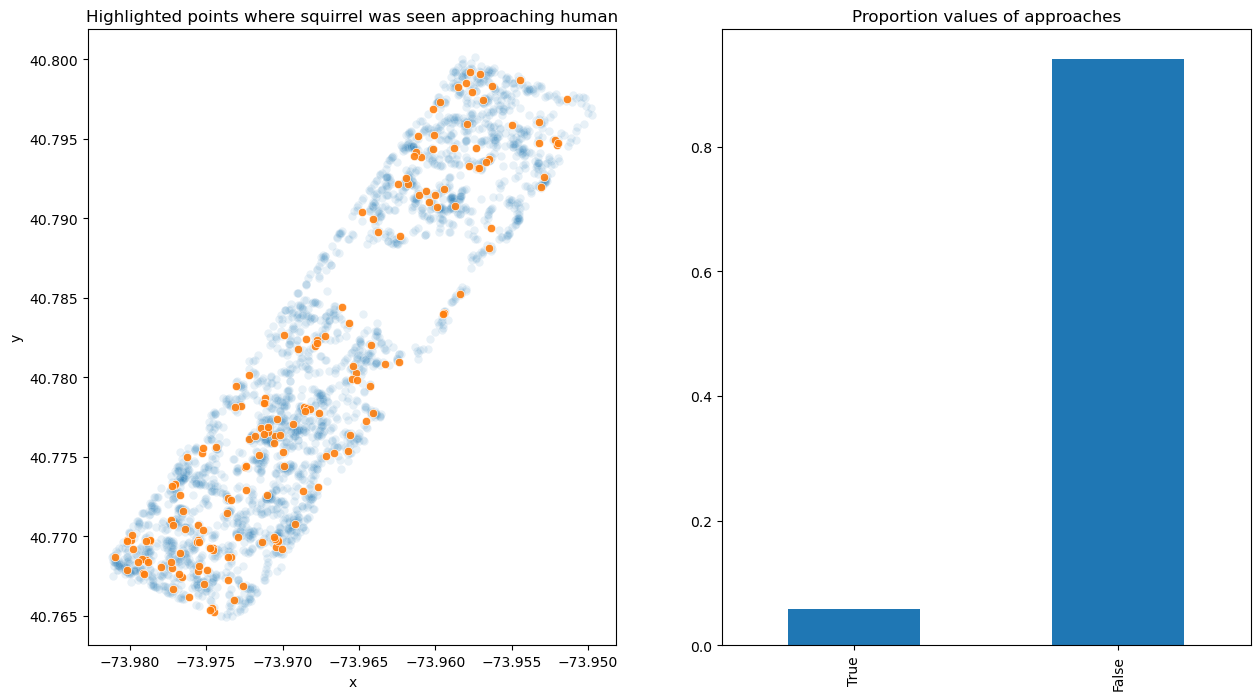

In [21]:
scatterplot_xy_true_elements_vs_all(df, 'approaches', 'Highlighted points where squirrel was seen approaching human')

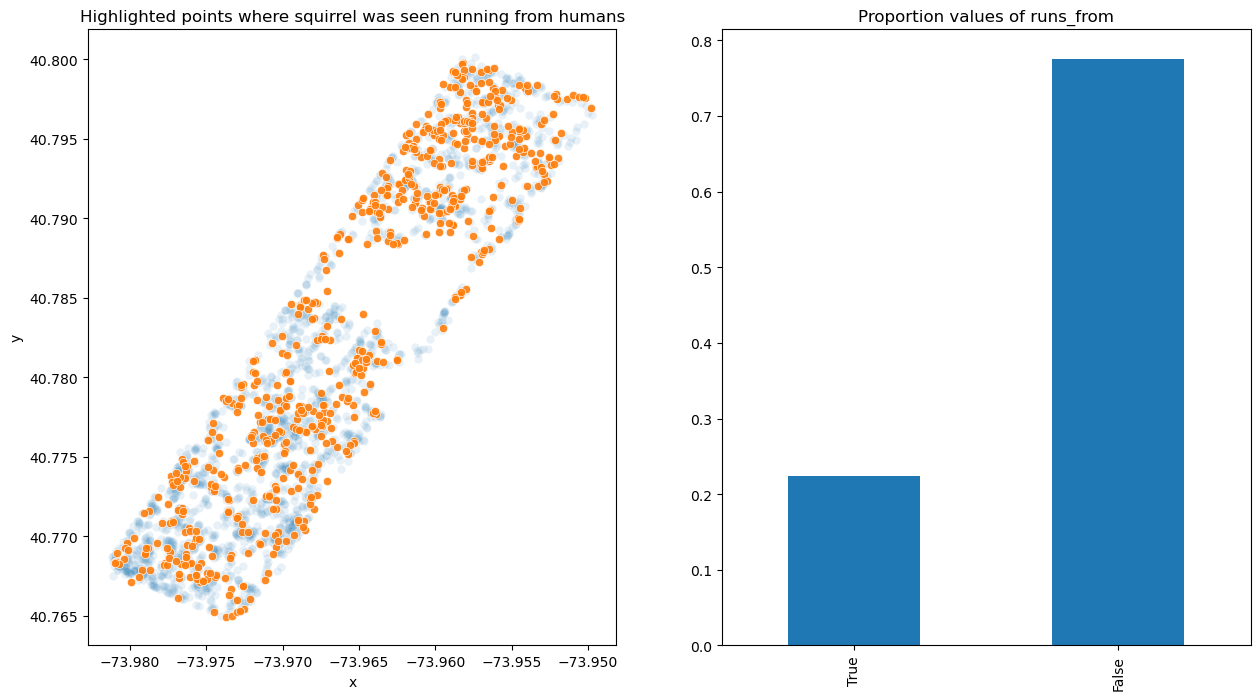

In [22]:
scatterplot_xy_true_elements_vs_all(df, 'runs_from', 'Highlighted points where squirrel was seen running from humans')


*Observations*

- At first glance, there is no significant amount of interaction with humans. 

- 10% of the squirrels were approaching humans seeking food while 90% of squirrels were not. 

- Among these interactions, there seems to be more in the borders of central park and more specifically in Central Park South. This can be because there is more commercial activity right at the entrances of the park like restaurants, and food trucks so people would find it easier just to throw them some food. 

- Among all squirrels, more than 70% didn't see humans as threats

- 20% of squirrels saw humans as treats. Areas detected in this area are Central North in the North Woods area.

### Are they organized?

What is an organization in squirrels?

>There is previous research on this topic on how squirrels organize their food. In a study [published](https://royalsocietypublishing.org/doi/10.1098/rsos.170958) in the journal Royal Society Open Science, researchers at the University of Berkeley present evidence that eastern fox squirrels, a common sight in North America, organize the 3,000-10,000 nuts they stockpile each year by variety, quality.

One approach was to replicate this analysis by incorporating prior knowledge but based on our data, there are no sufficient quality variables in terms of food and type of food eaten by squirrels.

Our selected approach is to let our data do the talking completely unsupervised. 

Clustering pipeline:

1. Data preprocessing: drop features with more than 5% of missing data.

2. Data preprocessing: drop noisy features (id type and redundant like lat/long).

3. Data encoding: binarize boolean variables.  

4. Data encoding: One hot encode variable with k > 2 classes. 

5. Data encoding: Class mapping non-boolean binary variables.

6. Bringing data onto the same scale.

7. Run elbow method.

9. Run PCA and plot the explained variance ratio.

10. Run spectral Clustering on d-reduce data. 

11. Plot k-clusters based on the previous elbow method.

12. Compute and plot PCA loadings to see important variables in clusters



In [23]:
# Remove >5% missing values in features

df_org = df.drop(columns=['color_notes', 'other_interactions', 'other_activities', 'specific_location', 'highlight_fur_color', 'lat/long', 'date',
 'unique_squirrel_id', 'hectare', 'hectare_squirrel_number', 'above_ground_sighter_measurement']) 

In [24]:
eda.missing_values_table(df_org)

Your selected dataframe has 20 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
age,121,4.0
location,64,2.1
primary_fur_color,55,1.8


In [25]:
#sanity check
df_org.describe(include='object')

,shift,age,primary_fur_color,combination_of_primary_and_highlight_color,location
count,3023,2902,2968,3023,2959
unique,2,3,3,22,2
top,PM,Adult,Gray,Gray+,Ground Plane
freq,1676,2568,2473,895,2116


In [26]:
df_org = df_org[df_org.age != '?'] # remove bad quality data

In [27]:
eda.missing_values_table(df_org)

Your selected dataframe has 20 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
age,121,4.0
location,64,2.1
primary_fur_color,53,1.8


In [28]:
# imputing missing values with most frequent strategy given that our data is type object
from sklearn.impute import SimpleImputer
imp = SimpleImputer( strategy='most_frequent')
df_org[:] = imp.fit_transform(df_org)

In [29]:
# Encoding variables 
# Binarize boolean variables 
df_bool_encoded = (df_org * 1)

In [30]:
# sanity check
df_bool_encoded.describe(include='object')

,shift,age,primary_fur_color,combination_of_primary_and_highlight_color,location
count,3019,3019,3019,3019,3019
unique,2,2,3,22,2
top,PM,Adult,Gray,Gray+,Ground Plane
freq,1674,2689,2524,894,2179


In [32]:
# Encoding variables 
# Class map non boolean binary variables
# df_bool_class_encoded would be our starting point for next questions 
shift_mapping = {'PM': 1,'AM': 0}
age_mapping = {'Adult': 1,'Juvenile': 0}
location_mapping = {'Ground Plane': 1,'Above Ground': 0}

df_bool_encoded['shift'] = df_bool_encoded['shift'].map(shift_mapping)
df_bool_encoded['age'] = df_bool_encoded['age'].map(age_mapping )
df_bool_encoded['location'] =df_bool_encoded['location'].map(location_mapping )

In [34]:
#sanity check
df_bool_encoded.head()

,x,y,shift,age,primary_fur_color,combination_of_primary_and_highlight_color,location,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from
0,-73.956134,40.794082,1,1,Gray,+,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-73.968857,40.783783,0,1,Gray,+,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-73.974281,40.775534,1,1,Gray,Gray+,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-73.959641,40.790313,1,1,Gray,Gray+,1,0,0,0,1,1,0,0,0,0,0,0,0,1
4,-73.970268,40.776213,0,1,Gray,Gray+Cinnamon,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [35]:
# Encoding variables
# One hot encode variables with k > 2 classes 
df_org_encoded = pd.get_dummies(df_bool_encoded, columns=['primary_fur_color','combination_of_primary_and_highlight_color'])

In [36]:
# sanity check
df_org_encoded.head()

,x,y,shift,age,location,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,primary_fur_color_Black,primary_fur_color_Cinnamon,primary_fur_color_Gray,combination_of_primary_and_highlight_color_+,combination_of_primary_and_highlight_color_Black+,combination_of_primary_and_highlight_color_Black+Cinnamon,"combination_of_primary_and_highlight_color_Black+Cinnamon, White",combination_of_primary_and_highlight_color_Black+Gray,"combination_of_primary_and_highlight_color_Black+Gray, White",combination_of_primary_and_highlight_color_Black+White,combination_of_primary_and_highlight_color_Cinnamon+,combination_of_primary_and_highlight_color_Cinnamon+Black,"combination_of_primary_and_highlight_color_Cinnamon+Black, White",combination_of_primary_and_highlight_color_Cinnamon+Gray,"combination_of_primary_and_highlight_color_Cinnamon+Gray, Black","combination_of_primary_and_highlight_color_Cinnamon+Gray, White",combination_of_primary_and_highlight_color_Cinnamon+White,combination_of_primary_and_highlight_color_Gray+,combination_of_primary_and_highlight_color_Gray+Black,"combination_of_primary_and_highlight_color_Gray+Black, Cinnamon","combination_of_primary_and_highlight_color_Gray+Black, Cinnamon, White","combination_of_primary_and_highlight_color_Gray+Black, White",combination_of_primary_and_highlight_color_Gray+Cinnamon,"combination_of_primary_and_highlight_color_Gray+Cinnamon, White",combination_of_primary_and_highlight_color_Gray+White
0,-73.956134,40.794082,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-73.968857,40.783783,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-73.974281,40.775534,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-73.959641,40.790313,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-73.970268,40.776213,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
# Preprocessing the data
# Standarize data before clustering 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Scaling the Data 
scaler = StandardScaler() 

df_org_scaled = scaler.fit_transform(df_org_encoded)   


In [38]:
#sanity check
df_org_scaled.shape

(3019, 43)

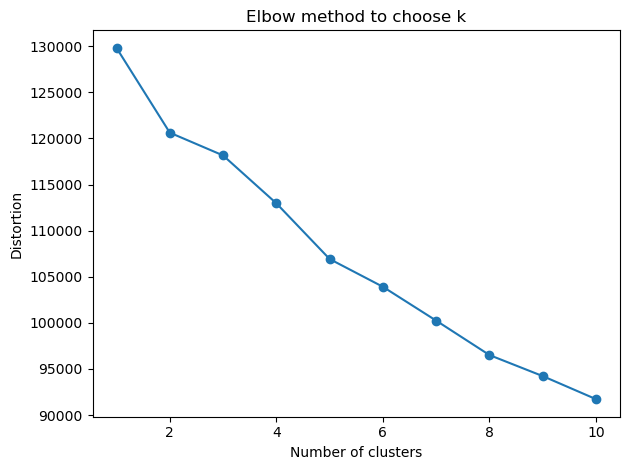

In [40]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df_org_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow method to choose k')
plt.tight_layout()
plt.show()

In [41]:
# Spectral clustering on d-reduce data

from sklearn.cluster import SpectralClustering 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

# Reducing  dimensions of the data with Principal Component Analysis
pca = PCA(n_components = 2)
pca_complete = PCA() 
X_principal = pca.fit_transform(df_org_scaled) 
X_principal_complete = pca_complete.fit_transform(df_org_scaled)
X_principal = pd.DataFrame(X_principal) 
X_principal_complete = pd.DataFrame(X_principal_complete) 

X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2) 

,P1,P2
0,-1.115529,1.442406
1,-0.771236,0.626629


In [42]:
# Compute loadings to se what's driving the cluster
import numpy as np
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df_org_encoded.columns)
loadings_mx = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings_mx, columns=['PC1', 'PC2'], index=df_org_encoded.columns)



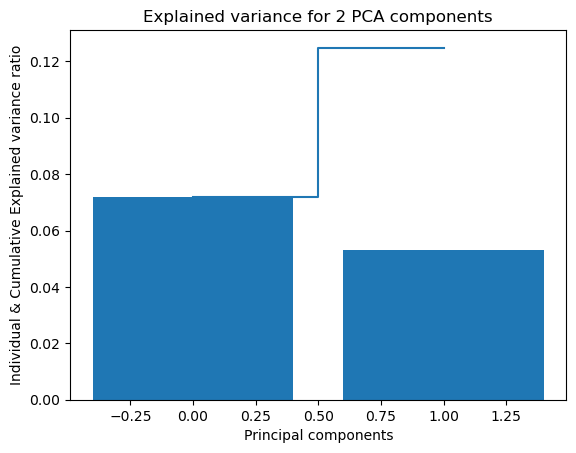

In [43]:
import numpy as np
plt.bar(range(0, len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_,  align='center')
plt.step(range(0, len(np.cumsum(pca.explained_variance_ratio_))),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.title('Explained variance for 2 PCA components')
plt.ylabel('Individual & Cumulative Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

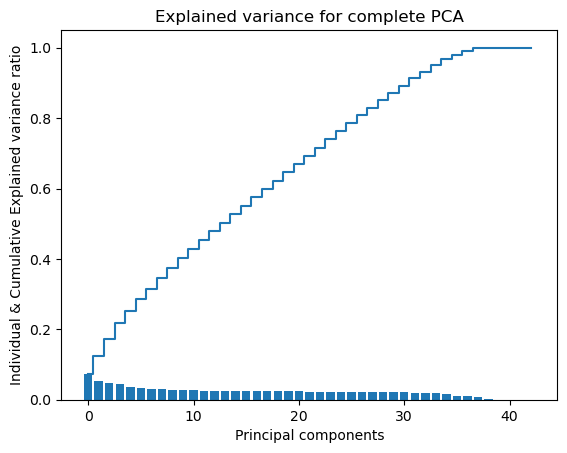

In [44]:
plt.bar(range(0, len(pca_complete.explained_variance_ratio_)),pca_complete.explained_variance_ratio_,  align='center', label= 'Individual explained variance')
plt.step(range(0, len(np.cumsum(pca_complete.explained_variance_ratio_))),np.cumsum(pca_complete.explained_variance_ratio_), where='mid', label= 'Cumulative explained variance')
plt.title('Explained variance for complete PCA')
plt.ylabel('Individual & Cumulative Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

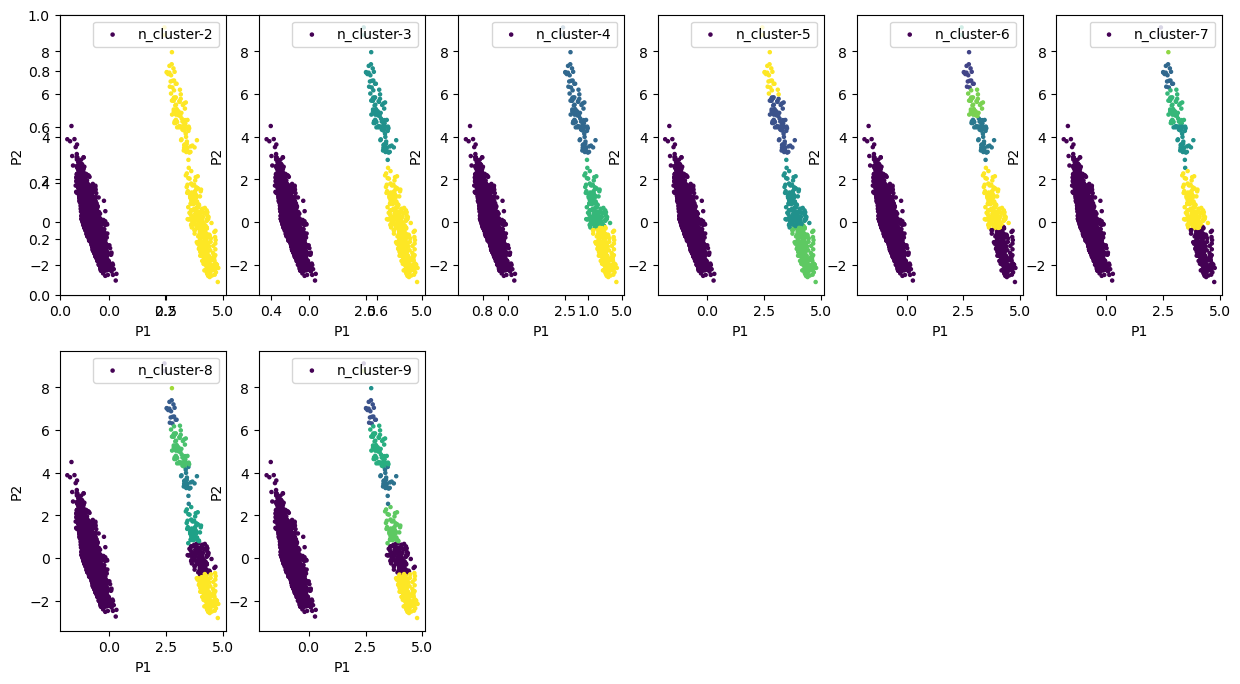

In [45]:
f = plt.figure(figsize=(15, 8))
f.add_subplot(2, 2, 1)
for i in range(2, 10):
 sc = SpectralClustering(n_clusters=i).fit(X_principal)
 f.add_subplot(2, 6, i-1)
 plt.scatter(X_principal['P1'], X_principal['P2'], s=5, c=sc.labels_, label="n_cluster-"+str(i))
 plt.legend()
 plt.xlabel('P1')
 plt.ylabel('P2')
 

plt.show() 

Text(0.5, 1.0, 'PCA Loadings on each variable')

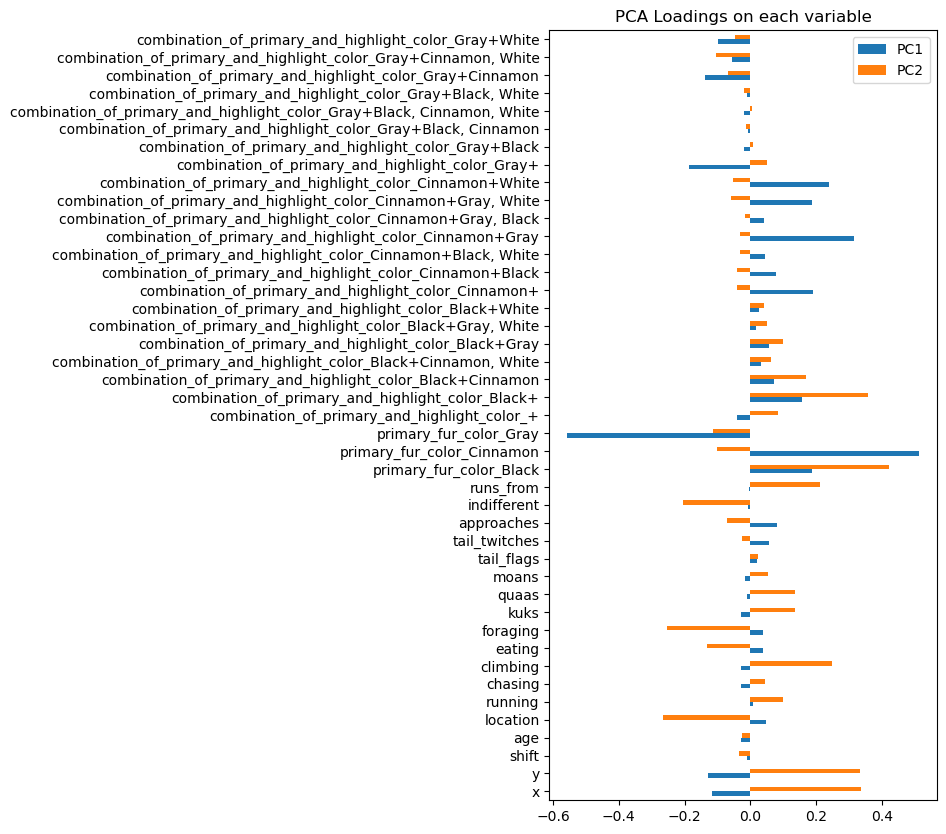

In [46]:
loadings.plot(kind = 'barh', figsize=(5,10))
plt.title('PCA Loadings on each variable')

*Observations and Conclusions*

- Finding k was a bit problematic. The approach taken "Elbow method" seems not to give us a clear answer on finding n_clusers. The line seems to be very smooth and no significant amount of decrease in distortion. That's why we plotted clusters from 2 - 10 and see manually what is the change. 

- Data preprocessing was key. The argument behind removing variables for clustering was mainly because of its missing data and lack of relevance to the first iterations. Lack of time was also an issue. Had I had more time, I'd probably do more experiments contemplating, above_ground_sighter_measuerment, although this variable would require special data encoding given it has too many classes. 

- I wasn't very sure about the preprocessing of geolocated variables like latitude and longitude. I found that these variables should't be scaled because of their nature. I did iterations with and without lat and long, and tried different scalings like MinMax but didn't see much of a difference in results, on the contrary, quite some noise. In the end, I decided to stick with the best practices and bring all features onto the same scale using standardization.

- There is a significantly low variance to explain when computing PCA, at least individually. Cumulative explained variance looks very exponential. 80% of the total variance was explained with the first 20 components. One thing to notice is that in previous iterations with MinMax scaling and lat/long without scaling 90% cumulative variance was explained with the first 15%

- I choose spectral clustering because it was an algorithm I didn't have much experience using. So I decided to have some fun and play with it, also it seemed a valid option to use. 

- **Can we confirm or deny if squirrels are organized?:** There is clear evidence of 2 clusters made across the iterations of the spectral clustering algorithm. PCA loadings helped us to see what is driving these clusters by finding the absolute value of each and its variable.

Seems the main forces driving the clusters are color, behavior, and location

- PC1's most important variable is color
- PC2 is color, behavior, and location

## Is their friendliness random or related to other factors?

Approach: 

- Multiple testing by measuring Pearson's correlation coefficient. 
- Supervised model to predict friendliness and see variable contribution.

H0: The distributions underlying the samples are uncorrelated and normally distributed

1. Define friendliness: 
    - Basically, we have 3 main variables related with human interaction: approaches, indifferent and runs_from.

    - It's our assumption to use approaches as our proxy for friendliness.

2. Remove noise based on the logic of the previous step.

3. Avoid data leaking.

5. Calculate person coefficeint.

5. Set alpha under the premise of Bonferroni correction: alpha= alpha/#number of test.

6. Confirm or decline the hypothesis.

7. Construct a model to perform a binary classification on the friendliness variable (target)

8. Compute performance metrics.

9. Compute feature importance

In [50]:
df_friendliness = df_bool_encoded.copy()

In [51]:
# Remove noise
# Squirrels cannot be friendly with humans and seen indifferent to humans 
df_friendliness = df_friendliness[~((df_friendliness.approaches == 1) & (df_friendliness.indifferent == 1))]  

In [52]:
# Remove noise
# Squirrels cannot be friendly and are seen running away from humans (Assumption)
# This is only based on our logic because technically a squirrel can run away from humans after seeking food from humans
df_friendliness = df_friendliness[~((df_friendliness.approaches == 1) & (df_friendliness.runs_from == 1))] 

In [53]:
# In order to avoid data leaking we remove indifferent runs_from 

df_friendliness = df_friendliness.drop(columns=['indifferent' , 'runs_from'])

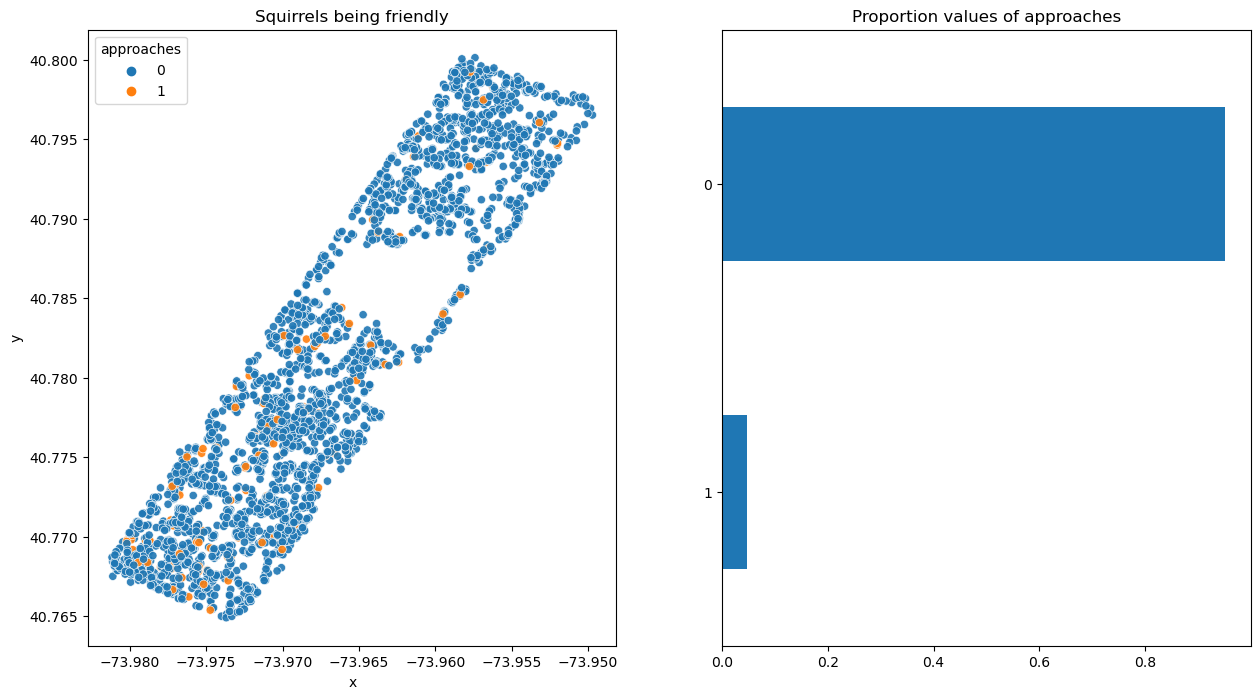

In [54]:
scatterplot_xy_all_places(df_friendliness, 'approaches', 'Squirrels being friendly')

In [55]:
df_friendliness.head()
# had i had more time: i would include day in date, and colors

,x,y,shift,age,primary_fur_color,combination_of_primary_and_highlight_color,location,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches
0,-73.956134,40.794082,1,1,Gray,+,1,0,0,0,0,0,0,0,0,0,0,0
1,-73.968857,40.783783,0,1,Gray,+,1,0,0,0,0,0,0,0,0,0,0,0
2,-73.974281,40.775534,1,1,Gray,Gray+,0,0,1,0,0,0,0,0,0,0,0,0
3,-73.959641,40.790313,1,1,Gray,Gray+,1,0,0,0,1,1,0,0,0,0,0,0
4,-73.970268,40.776213,0,1,Gray,Gray+Cinnamon,0,0,0,0,0,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Correlated features with  Friendliness (Pearson)')

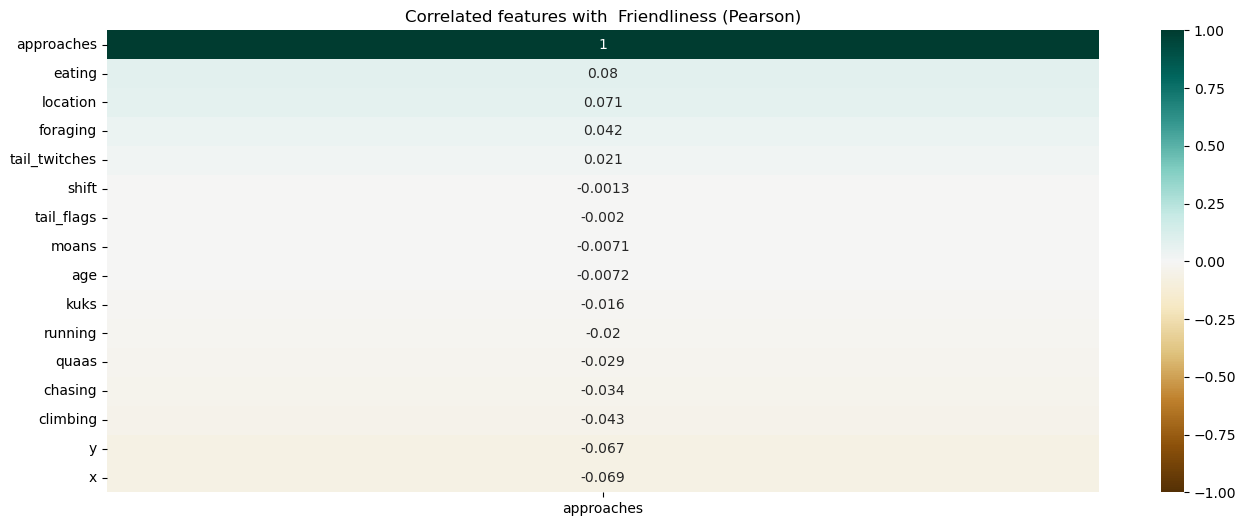

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))

sns.heatmap(df_friendliness.corr(numeric_only=True)[['approaches']].sort_values(by='approaches', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlated features with  Friendliness (Pearson)')

Text(0.5, 1.0, 'Correlated features with  Friendliness (Spearman)')

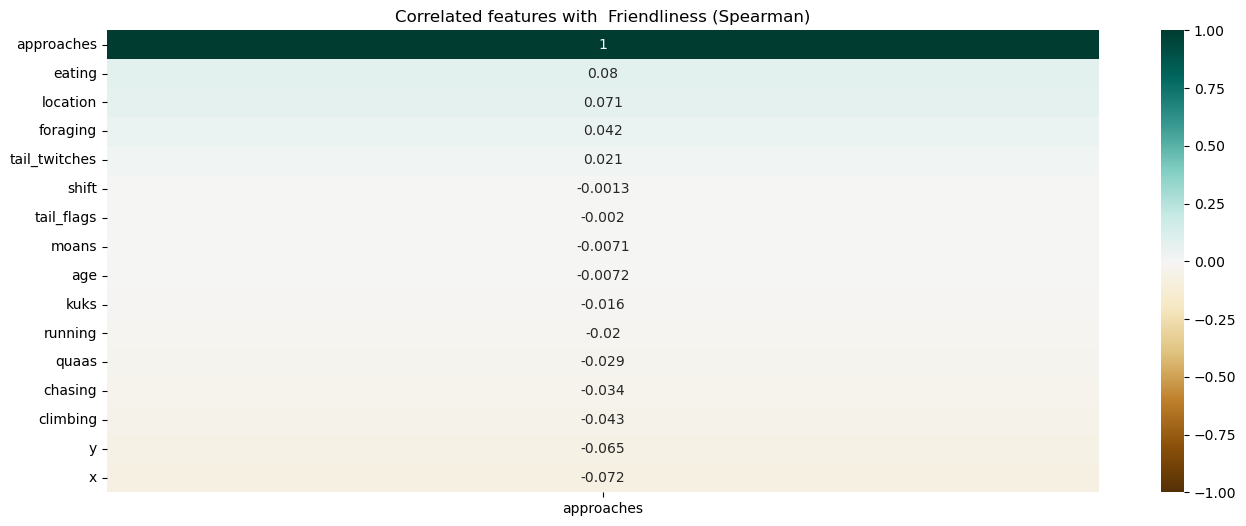

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))

sns.heatmap(df_friendliness.corr(method='spearman',numeric_only=True)[['approaches']].sort_values(by='approaches', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlated features with  Friendliness (Spearman)')

In [58]:
from scipy.stats import pearsonr, spearmanr
def calculate_pvalues_in_df_pearson(df):
    """
    Compute p-values given a dataframe
    """
    cols = pd.DataFrame(columns=df.columns)
    pvalues = cols.transpose().join(cols, how='outer')
    for i in df.columns:
        for c in df.columns:
            tmp = df[df[i].notnull() & df[c].notnull()]
            pvalues[i][c] = round(pearsonr(tmp[i], tmp[c])[1], 4)
    return pvalues

In [59]:
def calculate_pvalues_in_df_spearman(df):
    """
    Compute p-values given a datafarame
    """
    cols = pd.DataFrame(columns=df.columns)
    pvalues = cols.transpose().join(cols, how='outer')
    for i in df.columns:
        for c in df.columns:
            tmp = df[df[i].notnull() & df[c].notnull()]
            pvalues[i][c] = round(spearmanr(tmp[i], tmp[c])[1], 4)
    return pvalues

In [61]:
# Compute p-values on 15 variables used for correlations coefficients
p_values_pearson = calculate_pvalues_in_df_pearson(df_friendliness[['approaches','eating','location', 
'foraging', 'tail_twitches', 'shift', 'tail_flags','moans', 'age', 'kuks', 'running', 'quaas', 'chasing', 'climbing', 'y' , 'x']])

In [62]:
# Compute p-values on 15 variables used for correlations coefficients
p_values_spearman = calculate_pvalues_in_df_spearman(df_friendliness[['approaches','eating','location', 
'foraging', 'tail_twitches', 'shift', 'tail_flags','moans', 'age', 'kuks', 'running', 'quaas', 'chasing', 'climbing', 'y' , 'x']])

In [103]:
alpha = 0.05 # standard alpha
multiple_testing = 15 # Number of tests (variables within the study)
alpha_bonferroni = alpha / multiple_testing


In [116]:
print('P-values on Pearson coefficients with ',p_values_pearson.loc[p_values_pearson.approaches <= alpha_bonferroni, 'approaches'])

P-values on Pearson coefficients with  approaches       0.0
eating           0.0
location      0.0001
y             0.0002
x             0.0002
Name: approaches, dtype: object


In [117]:
print('P-values on Spearman coefficients with',p_values_spearman.loc[p_values_spearman.approaches <= alpha_bonferroni, 'approaches'])

P-values on Spearman coefficients with approaches       0.0
eating           0.0
location      0.0001
y             0.0004
x             0.0001
Name: approaches, dtype: object


### Confirm friendliness with a binary classification problem

In [69]:
df_friendliness.head()

,x,y,shift,age,primary_fur_color,combination_of_primary_and_highlight_color,location,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches
0,-73.956134,40.794082,1,1,Gray,+,1,0,0,0,0,0,0,0,0,0,0,0
1,-73.968857,40.783783,0,1,Gray,+,1,0,0,0,0,0,0,0,0,0,0,0
2,-73.974281,40.775534,1,1,Gray,Gray+,0,0,1,0,0,0,0,0,0,0,0,0
3,-73.959641,40.790313,1,1,Gray,Gray+,1,0,0,0,1,1,0,0,0,0,0,0
4,-73.970268,40.776213,0,1,Gray,Gray+Cinnamon,0,0,0,0,0,1,0,0,0,0,0,0


In [75]:
df_friendliness_encoded = pd.get_dummies(df_friendliness, columns=['primary_fur_color','combination_of_primary_and_highlight_color'])

In [88]:
# Prepare dataset and target
target = df_friendliness_encoded.pop('approaches')

df_friendliness_encoded['approaches'] = target
X = df_friendliness_encoded.iloc[:, :-1]
y = df_friendliness_encoded['approaches']


In [90]:
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

# Standarize Training  and Test data
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=1)

In [97]:
y_pred = tree_model.predict_proba(X_test_sc)

In [100]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred[:,1])


0.519547970228196

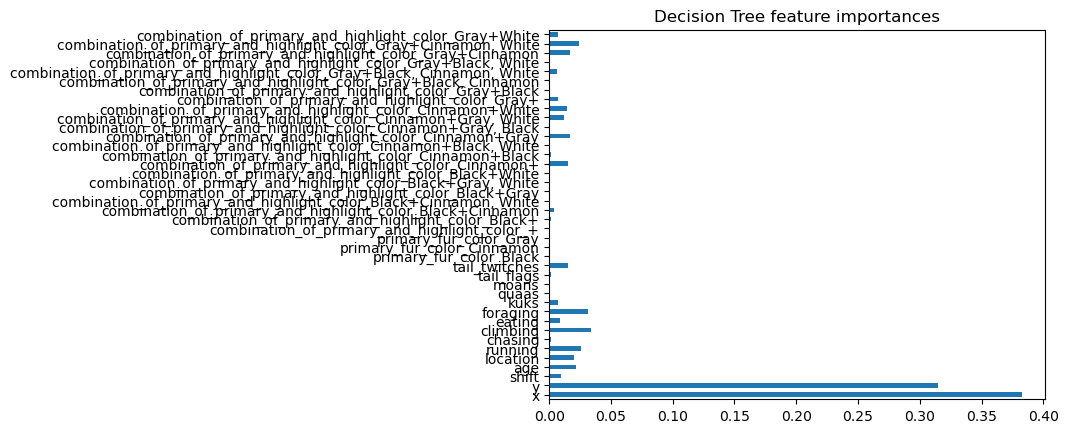

In [102]:
feat_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.title("Decision Tree feature importances")
plt.show()

*Observations and Conclusions*


Bonferroni correction
alpha = 0.05 / 15 = 0.003


For both Pearson and Spearman correlations.

**eating, location, latitude, longitude** are showing a P-value smaller than the significance level under Bonferroni correction (α =0.003). We REJECT the null hypothesis in favor of the alternative. We conclude that the correlation is statistically significant and different from 0 
We conclude that there is a linear relationship between friendliness (approaches) and (eating, location, lat and long) in the population at the α level ” However Pearson coefficients are very small.

A second opinion with Spearman coefficients was performed to make a more general approach and not be restrictive about the linear relationship.

However, since this is a 1:1 test. We constructed a basic predictive model and see the contribution of each variable for the prediction of friendliness.

The dataset shows a problem with imbalance, with "not friendly" as the majority class

Roc AUC score returns 0.51 which tells us that the predictive performance is somewhat poor

On the other hand feature importances are somehow similar to our previous correlations test. Latitude and Longitud present a major contribution to predicting friendliness followed by shift, age, and location.

We this we can conclude that there are factors related to the friendliness of a squirrel:

- Where is located. Perhaps a squirrel is likely to be more friendly if it's located in a certain region or place in Central Park. 

- Shift: Probably squirrels are likely to be more friendly either in the afternoon or morning. For future work, we can probably derive days from the date variable and see what days these animals are more friendly. Perhaps they are more similar to us than we think and they are in a better mood during the weekends.

- Age: Maybe juvenile squirrels are more friendly than adults
